In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:

#Checking for missing values
df.isnull().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:

df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'],drop_first=True)
df.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


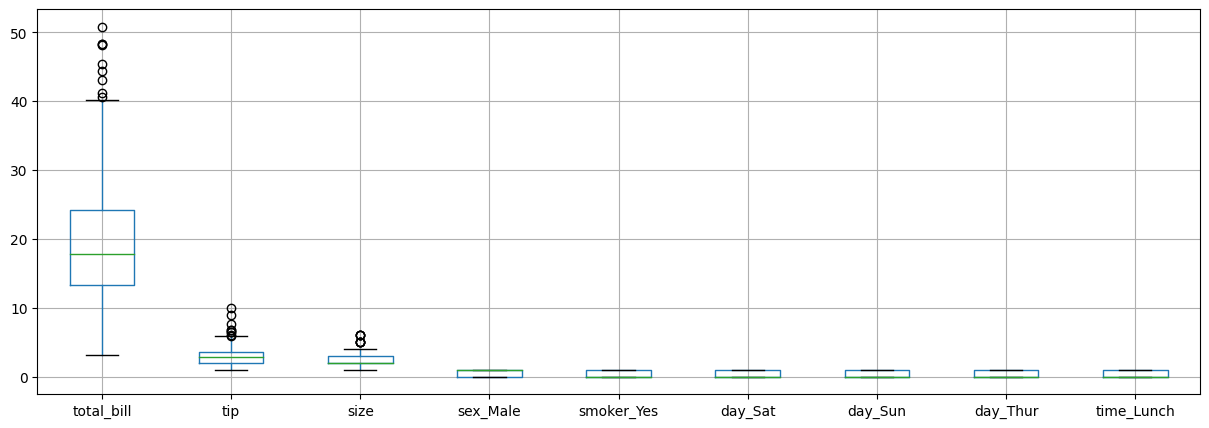

In [ ]:

df.boxplot(figsize=(15, 5))
plt.show()


In [ ]:
#From the boxplot we can see no outliers are present


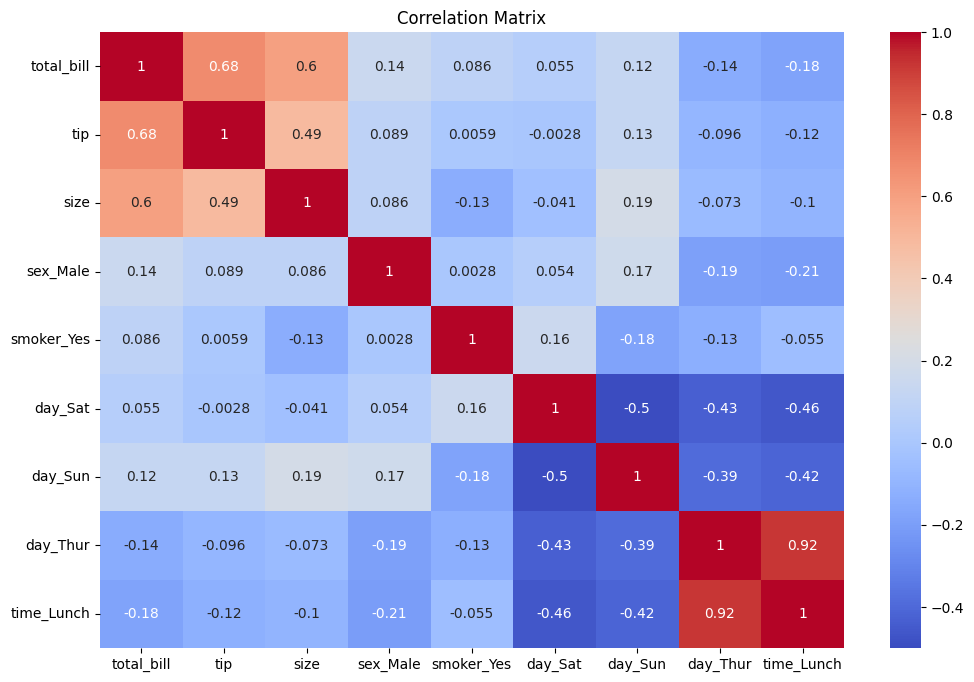

In [ ]:

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target variable (y)
X = df.drop('tip', axis=1)
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared and MSE for both train and test data
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"R-squared (Train): {r2_train:.4f}")
print(f"MSE (Train): {mse_train:.4f}")
print(f"R-squared (Test): {r2_test:.4f}")
print(f"MSE (Test): {mse_test:.4f}")


R-squared (Train): 0.4582
MSE (Train): 1.1007
R-squared (Test): 0.4373
MSE (Test): 0.7034


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value

# Fit the model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled training and testing data
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate R-squared and MSE for both train and test data
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Print the results
print(f"R-squared (Train - Ridge): {r2_train_ridge:.4f}")
print(f"MSE (Train - Ridge): {mse_train_ridge:.4f}")
print(f"R-squared (Test - Ridge): {r2_test_ridge:.4f}")
print(f"MSE (Test - Ridge): {mse_test_ridge:.4f}")


R-squared (Train - Ridge): 0.4582
MSE (Train - Ridge): 1.1007
R-squared (Test - Ridge): 0.4383
MSE (Test - Ridge): 0.7021


In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge Regression model
ridge_model = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the scaled testing data
y_test_pred_grid = best_model.predict(X_test_scaled)
y_train_pred_grid = best_model.predict(X_train_scaled)

# Calculate R-squared for the test data
r2_test_grid = r2_score(y_test, y_test_pred_grid)
r2_train_grid = r2_score(y_train, y_train_pred_grid)

# Print the results
print(f"R-squared (Test - GridSearchCV): {r2_test_grid:.4f}")
print(f"R-squared (Train - GridSearchCV): {r2_train_grid:.4f}")


Best parameters: {'alpha': 10}
R-squared (Test - GridSearchCV): 0.4453
R-squared (Train - GridSearchCV): 0.4572


In [ ]:


from sklearn.linear_model import Lasso

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create a Lasso Regression model
lasso_model = Lasso()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the scaled testing data
y_test_pred_grid = best_model.predict(X_test_scaled)
y_train_pred_grid = best_model.predict(X_train_scaled)

# Calculate R-squared for the test data
r2_test_grid = r2_score(y_test, y_test_pred_grid)
r2_train_grid = r2_score(y_train, y_train_pred_grid)

# Print the results
print(f"R-squared (Test - GridSearchCV): {r2_test_grid:.4f}")
print(f"R-squared (Train - GridSearchCV): {r2_train_grid:.4f}")


Best parameters: {'alpha': 0.1}
R-squared (Test - GridSearchCV): 0.5102
R-squared (Train - GridSearchCV): 0.4454


In [ ]:


# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge Regression model
ridge_model = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the scaled testing data
y_test_pred_grid = best_model.predict(X_test_scaled)
y_train_pred_grid = best_model.predict(X_train_scaled)

# Calculate R-squared for the test data
r2_test_grid = r2_score(y_test, y_test_pred_grid)
r2_train_grid = r2_score(y_train, y_train_pred_grid)

# Print the results
print(f"R-squared (Test - GridSearchCV): {r2_test_grid:.4f}")
print(f"R-squared (Train - GridSearchCV): {r2_train_grid:.4f}")


Best parameters: {'alpha': 10}
R-squared (Test - GridSearchCV): 0.4453
R-squared (Train - GridSearchCV): 0.4572


R-squared (Train - Decision Tree): 1.0000
R-squared (Test - Decision Tree): -0.0042


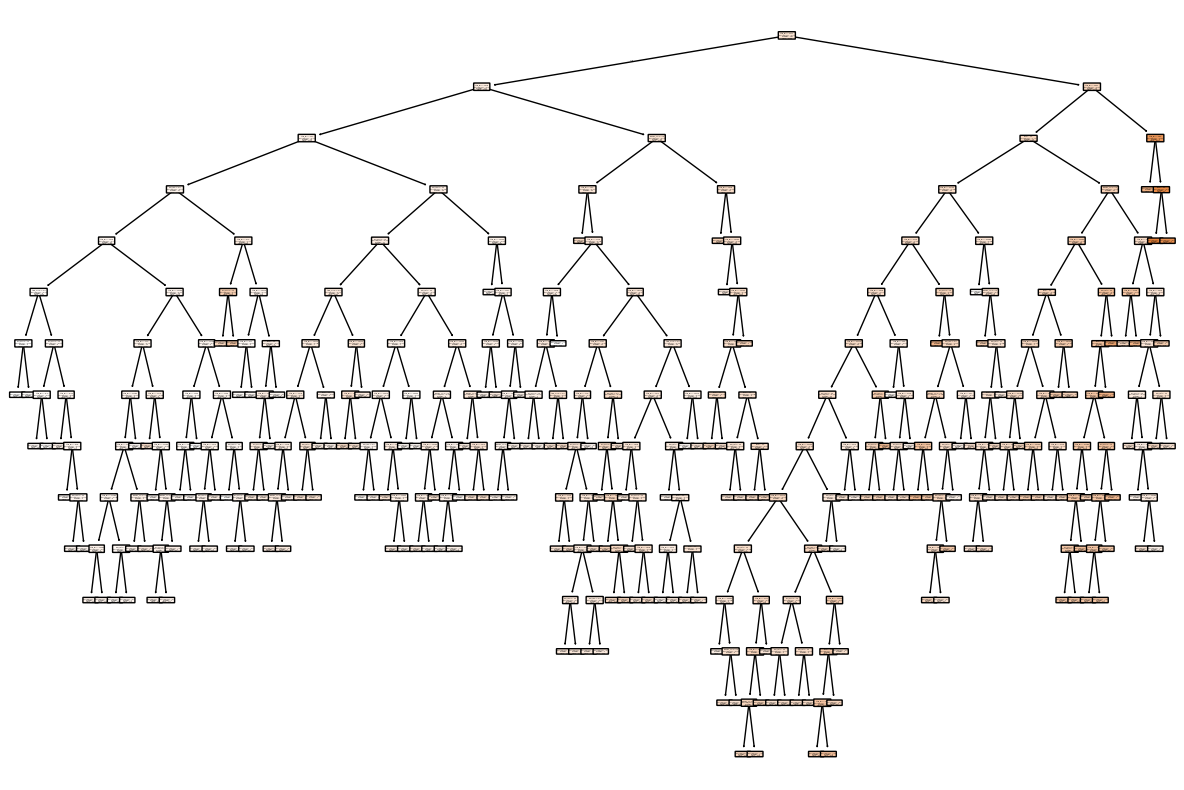

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

# Print the results
print(f"R-squared (Train - Decision Tree): {r2_train_tree:.4f}")
print(f"R-squared (Test - Decision Tree): {r2_test_tree:.4f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, class_names=['tip'])
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
R-squared (Train - Decision Tree): 0.5710
R-squared (Test - Decision Tree): 0.2156


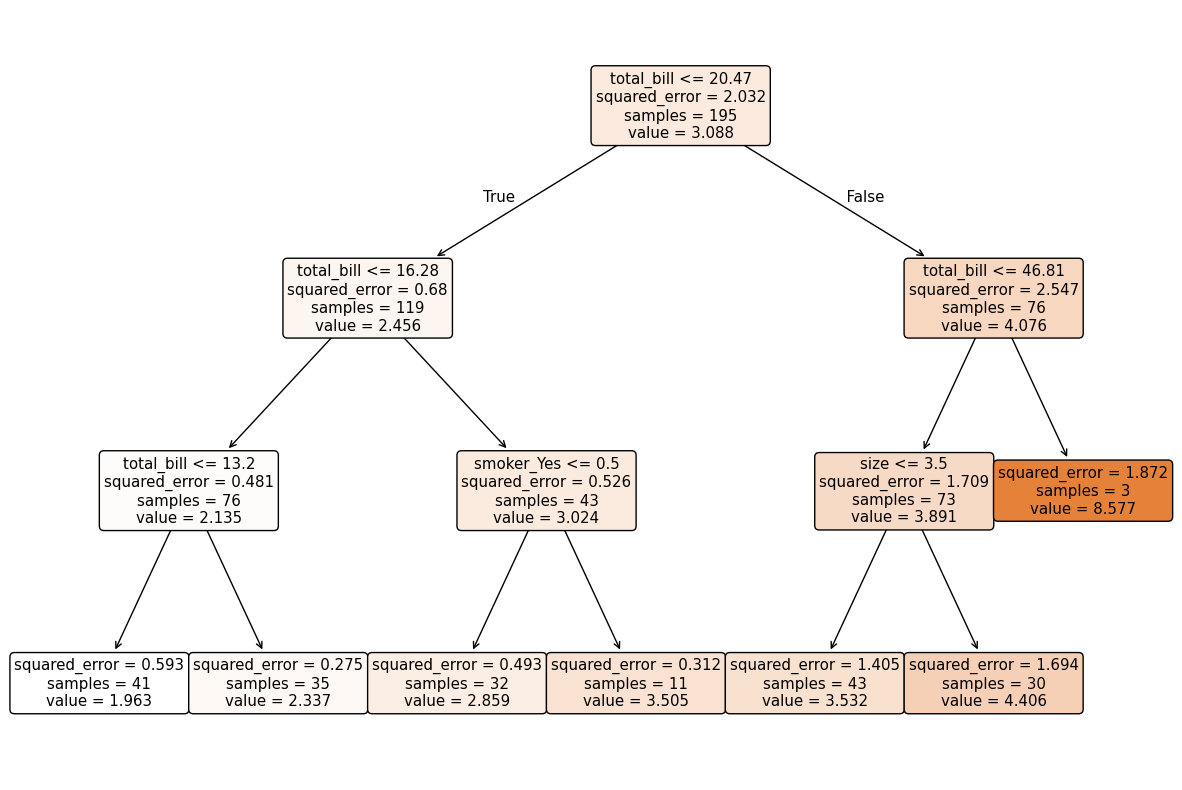

In [ ]:


# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data
y_train_pred_tree = best_model.predict(X_train)
y_test_pred_tree = best_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

# Print the results
print(f"R-squared (Train - Decision Tree): {r2_train_tree:.4f}")
print(f"R-squared (Test - Decision Tree): {r2_test_tree:.4f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True, class_names=['tip'])
plt.show()


In [ ]:


from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print the results
print(f"R-squared (Train - Random Forest): {r2_train_rf:.4f}")
print(f"R-squared (Test - Random Forest): {r2_test_rf:.4f}")


R-squared (Train - Random Forest): 0.9144
R-squared (Test - Random Forest): 0.2642


In [ ]:


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data
y_train_pred_rf = best_model.predict(X_train)
y_test_pred_rf = best_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print the results
print(f"R-squared (Train - Random Forest): {r2_train_rf:.4f}")
print(f"R-squared (Test - Random Forest): {r2_test_rf:.4f}")


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R-squared (Train - Random Forest): 0.7636
R-squared (Test - Random Forest): 0.3035


In [ ]:


import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# Print the results
print(f"R-squared (Train - XGBoost): {r2_train_xgb:.4f}")
print(f"R-squared (Test - XGBoost): {r2_test_xgb:.4f}")

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200],
    'max_depth': [3],
    'learning_rate': [0.01],
}

# Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data
y_train_pred_xgb = best_model.predict(X_train)
y_test_pred_xgb = best_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# Print the results
print(f"R-squared (Train - XGBoost - GridSearchCV): {r2_train_xgb:.4f}")
print(f"R-squared (Test - XGBoost - GridSearchCV): {r2_test_xgb:.4f}")


R-squared (Train - XGBoost): 0.9994
R-squared (Test - XGBoost): 0.3022
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
R-squared (Train - XGBoost - GridSearchCV): 0.6410
R-squared (Test - XGBoost - GridSearchCV): 0.3994


In [ ]:


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data
y_train_pred_rf = best_model.predict(X_train)
y_test_pred_rf = best_model.predict(X_test)

# Calculate R-squared for both train and test data
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print the results
print(f"R-squared (Train - Random Forest): {r2_train_rf:.4f}")
print(f"R-squared (Test - Random Forest): {r2_test_rf:.4f}")


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R-squared (Train - Random Forest): 0.7636
R-squared (Test - Random Forest): 0.3035


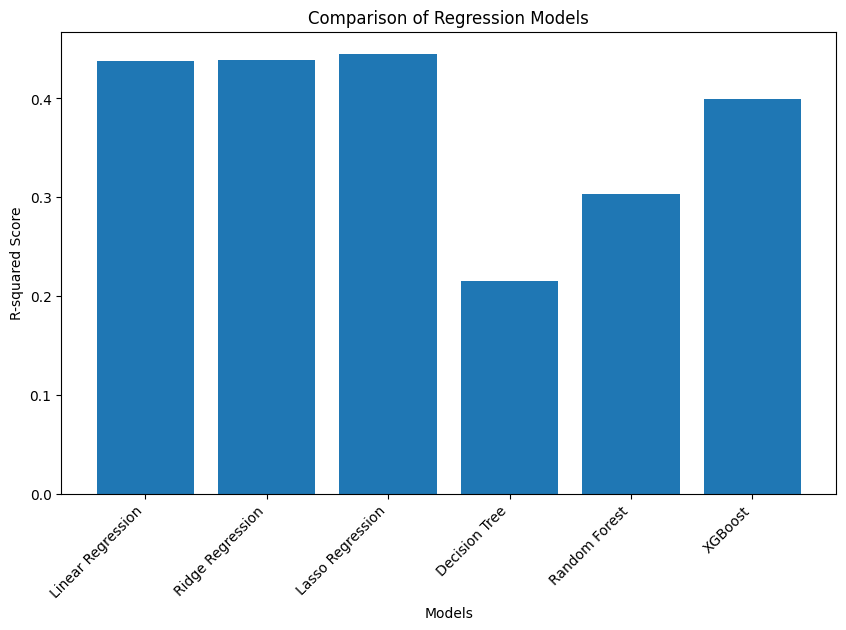

In [ ]:


# Create a dictionary to store the model names and their R-squared scores
model_scores = {
    'Linear Regression': r2_test,
    'Ridge Regression': r2_test_ridge,
    'Lasso Regression': r2_test_grid,  # Using the best model from GridSearchCV
    'Decision Tree': r2_test_tree,
    'Random Forest': r2_test_rf,
    'XGBoost': r2_test_xgb
}

# Create a bar chart to compare the models
plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values())
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')
plt.show()


# From this we can see that lasso is the best model as it offers the best scores without overfitting.